In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from matplotlib import pyplot as plt
df = pd.read_csv('MobileData.csv',usecols=['Name','ProcessUnit','Ram','Primary Camera','Secondray Camera','Design','Display','price'])
df

,Name,ProcessUnit,Ram,Primary Camera,Secondray Camera,Design,Display,price
0,Samsung galaxy j6+,3,1,3,2,3,2,16999
1,Samsung Galaxy A7,4,2,4,5,4,3,24990
2,Samsung Galaxy Note 9,5,5,5,4,5,5,94900
3,Samsung Galaxy J2 Core,4,1,2,1,2,2,8290
4,Samsung Galaxy J8,1,3,3,3,2,2,21990
5,Samsung Galaxy A6+,1,3,3,4,3,4,26900
6,Samsung Galaxy J4,2,2,2,1,2,2,11990
7,Samsung Galaxy J7 prime,4,3,2,2,3,2,20900
8,Samsung Galaxy S9+,5,4,4,4,4,5,70900
9,Samsung Galaxy J7 Pro,4,3,3,4,4,3,29490


In [2]:
df ['Average'] = df.drop('price',axis=1).mean(axis=1)
df

,Name,ProcessUnit,Ram,Primary Camera,Secondray Camera,Design,Display,price,Average
0,Samsung galaxy j6+,3,1,3,2,3,2,16999,2.333333
1,Samsung Galaxy A7,4,2,4,5,4,3,24990,3.666667
2,Samsung Galaxy Note 9,5,5,5,4,5,5,94900,4.833333
3,Samsung Galaxy J2 Core,4,1,2,1,2,2,8290,2.000000
4,Samsung Galaxy J8,1,3,3,3,2,2,21990,2.333333
5,Samsung Galaxy A6+,1,3,3,4,3,4,26900,3.000000
6,Samsung Galaxy J4,2,2,2,1,2,2,11990,1.833333
7,Samsung Galaxy J7 prime,4,3,2,2,3,2,20900,2.666667
8,Samsung Galaxy S9+,5,4,4,4,4,5,70900,4.333333
9,Samsung Galaxy J7 Pro,4,3,3,4,4,3,29490,3.500000


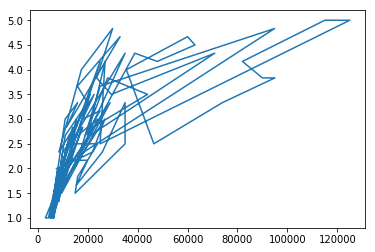

In [3]:
plt.plot(df['price'],df['Average'],label='BarGraph')
plt.show()

In [4]:
df['UserDemand'] = ['70%' if row['price']>20000 and row['price']<=25000 and row['Average']>=3.5 else '50%' if row['price']>20000 and row['price']<=25000 and row['Average']>=3.0 and row['Average']<3.5 or row['price']>15000 and row['price']<=20000 and row['Average']>=3.0 and row['Average']<3.5 else '60%' if row['price']>25000 and row['price']<=30000 and row['Average']>=3.8 or row['price']>30000 and row['price']<=35000 and row['Average']>=3.8 else '40%' if row['price']>35000 and row['price']<=40000 and row['Average']>=4  or row['price']>25000 and row['price']<=30000 and row['Average']>=3.0 and row['Average']<3.5 or row['price']>40000 and row['Average']>=4.0 else '20%' if row['price']>40000 and row['Average']>=3.0 and row['Average']<3.5 else '30%' for index,row in df.iterrows()]
print(df['UserDemand'].value_counts())

30%    70
40%    12
50%     7
60%     5
70%     5
20%     1
Name: UserDemand, dtype: int64


#if  profit is same from every mobile then profit dependec userdemand

In [5]:
df['Prediction'] = ['lot Profit' if row['UserDemand'] == '70%' or row['UserDemand'] == '60%' else 'Medium Profit' if row['UserDemand'] == '40%' or row['UserDemand'] == '50%' else 'Low Profit' for index,row  in df.iterrows() ]
print(df['Prediction'].value_counts())

Low Profit       71
Medium Profit    19
lot Profit       10
Name: Prediction, dtype: int64


In [6]:

label_quality = LabelEncoder()
df['Prediction'] = label_quality.fit_transform(df['Prediction'])
df['UserDemand'] = label_quality.fit_transform(df['UserDemand'])
df

,Name,ProcessUnit,Ram,Primary Camera,Secondray Camera,Design,Display,price,Average,UserDemand,Prediction
0,Samsung galaxy j6+,3,1,3,2,3,2,16999,2.333333,1,0
1,Samsung Galaxy A7,4,2,4,5,4,3,24990,3.666667,5,2
2,Samsung Galaxy Note 9,5,5,5,4,5,5,94900,4.833333,2,1
3,Samsung Galaxy J2 Core,4,1,2,1,2,2,8290,2.000000,1,0
4,Samsung Galaxy J8,1,3,3,3,2,2,21990,2.333333,1,0
5,Samsung Galaxy A6+,1,3,3,4,3,4,26900,3.000000,2,1
6,Samsung Galaxy J4,2,2,2,1,2,2,11990,1.833333,1,0
7,Samsung Galaxy J7 prime,4,3,2,2,3,2,20900,2.666667,1,0
8,Samsung Galaxy S9+,5,4,4,4,4,5,70900,4.333333,2,1
9,Samsung Galaxy J7 Pro,4,3,3,4,4,3,29490,3.500000,1,0


In [7]:
X = df.drop(['Prediction','Name'],axis=1)
y = df['Prediction']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape,X_test.shape)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

(75, 9) (25, 9)


c:\users\tareku~1\virtua~1\mobila~1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\tareku~1\virtua~1\mobila~1\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\tareku~1\virtua~1\mobila~1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\tareku~1\virtua~1\mobila~1\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc)*100)
print(classification_report(y_test, pred_rfc))

60.0
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6
           2       1.00      0.20      0.33         5

   micro avg       0.60      0.60      0.60        25
   macro avg       0.57      0.40      0.39        25
weighted avg       0.59      0.60      0.53        25



In [9]:
clf = SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)
print(accuracy_score(y_test, pred_clf)*100,'%')

64.0 %


In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, pred_knn)*100,'%')

60.0 %


In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, pred_knn)*100,'%')

60.0 %
